In [1]:
from IPython.core.display import display_html, HTML
from urllib.request import urlopen

cssurl = 'http://j.mp/1DnuN9M'
display_html(urlopen(cssurl).read(), raw=True)

In [2]:
from numpy import empty

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib.pyplot import figure, style
from mpl_toolkits.mplot3d import Axes3D
style.use("ggplot")

In [4]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    ẋ= s*(y - x)
    ẏ= r*x - y - x*z
    ż= x*y - b*z
    return ẋ, ẏ, ż

def qichen(x, y, z, α=38 , β=8/3, γ=80):
    ẋ= α*(y - x) + y*z
    ẏ= γ*x + y - x*z
    ż= x*y - β*z
    return ẋ, ẏ, ż

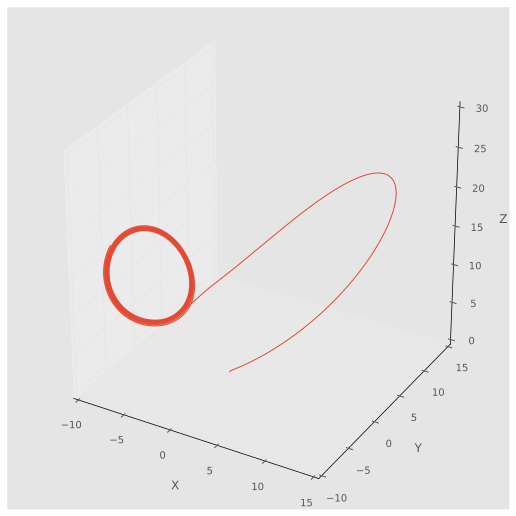

In [5]:
δt = 0.01
N = 1000

# Need one more for the initial values
xs = empty((N + 1,))
ys = empty((N + 1,))
zs = empty((N + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0.1, 0, 0)

# Stepping through "time".
for i in range(N) :
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], 5, 15, 2)
    xs[i + 1] = xs[i] + (x_dot * δt)
    ys[i + 1] = ys[i] + (y_dot * δt)
    zs[i + 1] = zs[i] + (z_dot * δt)

fig = figure(figsize=(9,9))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

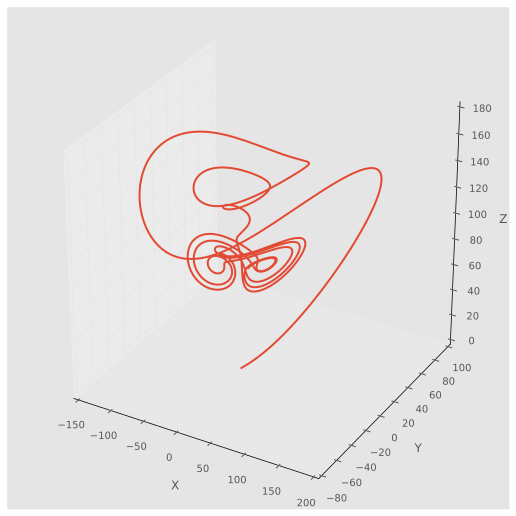

In [42]:
δt = 0.0005
N = 5000

# Need one more for the initial values
xs = empty((N + 1,))
ys = empty((N + 1,))
zs = empty((N + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0.1, 0, 0)

# Stepping through "time".
for i in range(N):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = qichen(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * δt)
    ys[i + 1] = ys[i] + (y_dot * δt)
    zs[i + 1] = zs[i] + (z_dot * δt)

fig = figure(figsize=(9,9))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, linewidth=2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

In [7]:
from csv import writer

In [47]:
data = zip(xs[::10]/4, ys[::10]/4, zs[::10]/4)

In [48]:
with open('test.csv', 'w', newline='') as fp:
    a = writer(fp, delimiter=',')
    a.writerows(data)

In [10]:
len(xs)

3001

In [11]:
len(xs[::6])

501

In [19]:
min(xs/4) -  max(xs/4)

-74.164783279997096

In [13]:
min(ys), max(ys)

(-91.624696542699709, 86.033493255571045)

In [14]:
min(zs), max(zs)

(0.0, 199.27255213932656)

In [15]:
xs/2

array([  0.05      ,   0.047511  ,   0.04540675, ..., -19.31780985,
       -20.03079382, -20.76281205])